#  Chapter 3.1.6 Boston Housing Data, Figures 3.17, 3.18

This example is a first use of several popular data science module. Here we use

* `sklearn` to load data
* `pandas` to create data frames
* `seaborn` for more sophisticated plotting

## Load a standard `sklearn` dataset 

In [1]:
from sklearn.datasets import load_boston
dataset = load_boston()  # load the dataset

print(f"Basic dataset data structure components: {dir(dataset)}")
print(f"Dataset description: {dataset['DESCR']}")

features = dataset['data']
targets = dataset['target']
feature_names = dataset['feature_names']



Basic dataset data structure components: ['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']
Dataset description: .. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        

C:\Users\andre\anaconda3\envs\ML_book\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housi

## Create a custom dataframe using `pandas`

In [2]:
import pandas as pd

# Create a pandas dataframe
df = pd.DataFrame(features,
                  columns=feature_names) 
# assign the label PRICE to the target values
df['PRICE'] = targets

# Select useful features
room_label = "RM"
price_label = "PRICE"
crime_label = "CRIM"
age_label = "AGE"
distance_label = "DIS"

# make a new dataframe of data that interests us
my_df = df[[room_label, crime_label, age_label,
           distance_label, price_label]]

## Get the first impression of the data's basic statistics

In [3]:
my_df.describe()

RM        CRIM         AGE         DIS       PRICE
count  506.000000  506.000000  506.000000  506.000000  506.000000
mean     6.284634    3.613524   68.574901    3.795043   22.532806
std      0.702617    8.601545   28.148861    2.105710    9.197104
min      3.561000    0.006320    2.900000    1.129600    5.000000
25%      5.885500    0.082045   45.025000    2.100175   17.025000
50%      6.208500    0.256510   77.500000    3.207450   21.200000
75%      6.623500    3.677083   94.075000    5.188425   25.000000
max      8.780000   88.976200  100.000000   12.126500   50.000000

## You can use `seaborn` for quick graphical analysis

Seaborn can use dataframes as input and extracts data based non labels and uses those as annotations.

<AxesSubplot:xlabel='PRICE', ylabel='RM'>

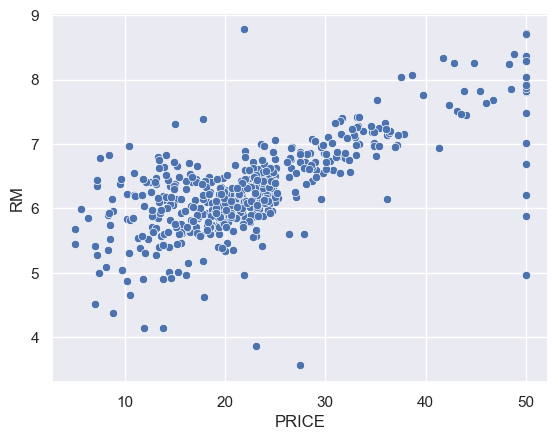

In [4]:
import seaborn as sns
# example crossplot
sns.set()
sns.scatterplot(x="PRICE", y="RM", data=my_df)

Crossplot all features to recognice corellations in the data. The diagonal displays distribution histograms of the individual features.

In [ ]:
# scatter matrix
sns.pairplot(my_df)